# In this notebook there will be trained model to predict student Performance

In [60]:
# Import necessary libs
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import ColumnTransformer

In [39]:
# Download dataset
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

dataset = pd.read_csv(f'{path}/Student_Performance.csv')

## Introducing with the dataset

In [40]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [42]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Visualization part

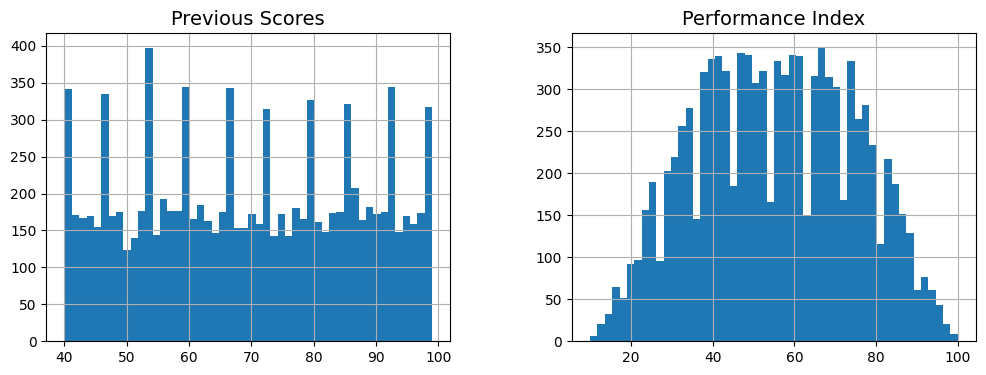

In [30]:
import matplotlib.pyplot as plt

# Histogram
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

dataset.hist(bins=50, figsize=(12, 4), column=['Previous Scores', 'Performance Index'])
plt.show()

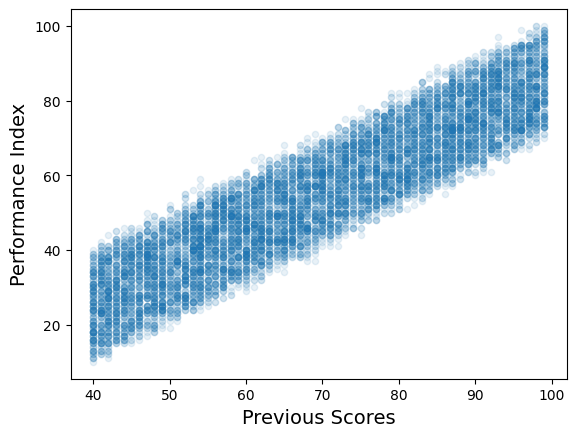

In [31]:
# Scatter plot
dataset.plot(kind="scatter", x="Previous Scores", y="Performance Index", alpha=0.1)
plt.show()

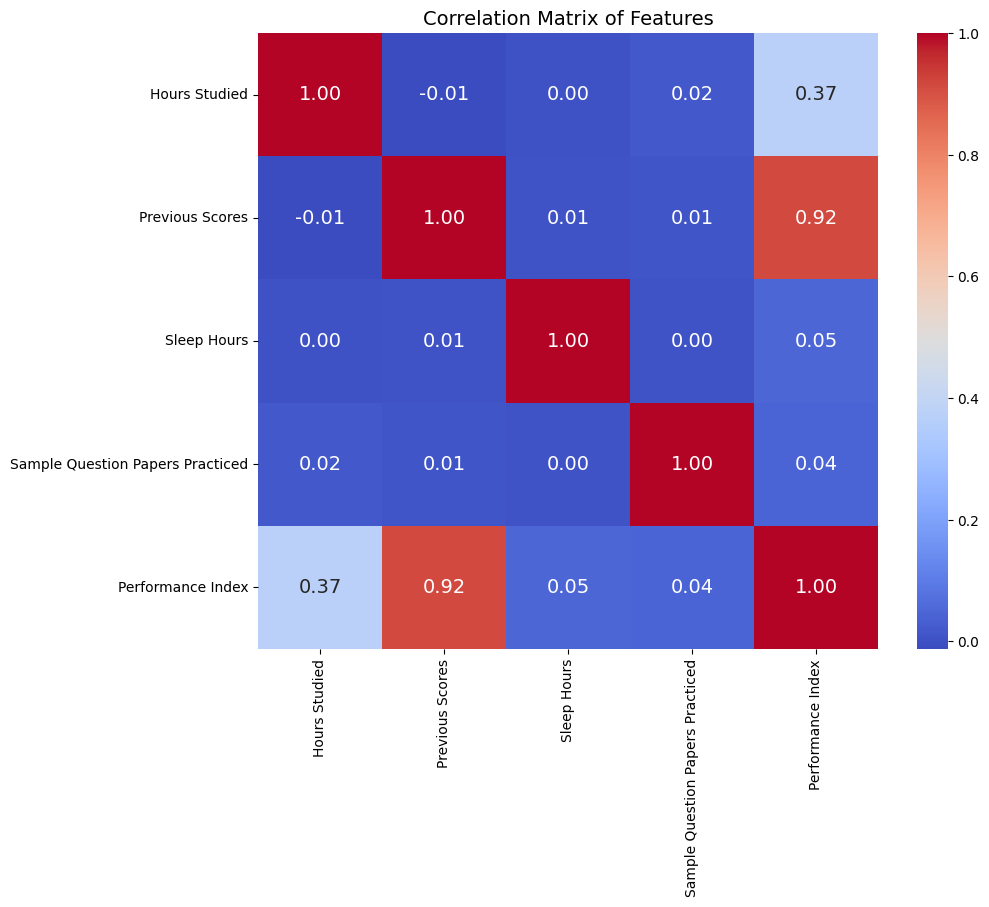

In [32]:
import seaborn as sns

corr = dataset[dataset.select_dtypes(include=['number']).columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


## Preprocessing Steps

In [43]:
# Firstly need to split the dataset to target and other ones

X = dataset.drop(columns=['Performance Index'])
y = dataset['Performance Index']

In [44]:
X['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
# Convert 'Extracurricular Activities' which is categorical to binary encoding

X['Extracurricular Activities'] = X['Extracurricular Activities'].str.strip().map({'Yes': 1, 'No': 0})

In [47]:
X['Extracurricular Activities'].head()

,Extracurricular Activities
0,1
1,0
2,1
3,1
4,0


In [48]:
# Then need to split the data to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Define the steps and pipeline

numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features)])

steps = [("preprocessor", preprocessor), ("linear_regression", LinearRegression())]
pipeline = Pipeline(steps)

In [51]:
set_config(display='diagram') # to visualize the pipeline

In [55]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced'])])),
                ('linear_regression', LinearRegression())])

In [56]:
# Now need to train the model

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced'])])),
                ('linear_regression', LinearRegression())])

In [58]:
# Now predict the model with test set

y_pred = pipeline.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 4.18
Root Mean Squared Error: 2.05
R-squared Score: 0.99


# Conclusion
### The final steps shows that the work was done very perfect. As the metrics represents the R2 score shows 99% that is very good and the Root Mean Squared Error is almost 2